# Statistics for Data Science Workshop

## Data Science Society @Berkeley | Spring 2019

## Thursday, April 18, 2019



### Introduction

This notebook will be covering: 

*  Randomization, sampling
*  Hypothesis Testing
*  P Values
*  Probability

Throughout this notebook we use a python library called **Pandas** in order to store and display our data. If you would like to learn how to use Pandas in more detail, check out our Python workshop materials: https://tinyurl.com/dsspythonf18

https://pypi.python.org/pypi/datascience/


To run the cell below, click on "Run" above (right under the File Edit View... bar) or do Shift+Enter on your computer. This will run your current cell then move its position to the next one. 

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

## The Dataset

Let's use the same dataset "StudentPerformance.csv" that we used in the Hypothesis Testing Demo. You can find the dataset in the google drive folder!

Our dataset comes from Kaggle and contains information about the student, including their identity, education level, and test scores. Let's load it in using pandas and display the first couple of rows. 

If you would like to see more detailed descriptions of this dataset, click on this link:
https://www.kaggle.com/spscientist/students-performance-in-exams


### Before running the cell below, follow these steps:

1) Download the csv file from the google drive folder. Here is the link again for reference: 
https://tinyurl.com/statsfordsworkshop

2) Make sure Anaconda is downloaded on your computer. Launch the Jupyter Notebook app through Anaconda.

3) Once you launch it, the Jupyter Notebook dashboard will pop up.

4) Click on the "Upload" tab in the top right area.

5) Upload the StudentPerformance.csv file. 


### Run the cell below (Using Shift+Enter)

In [7]:
students = pd.read_csv("StudentsPerformance.csv")

In [8]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Exploration
The 'gender' column contains the unique values 'female' and 'male'.

In [9]:
gender = students['gender']
gender.head(5)

0    female
1    female
2    female
3      male
4      male
Name: gender, dtype: object

The 'math score' column contains individual data on student math scores

In [10]:
math = students['math score']
math.head(5)

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

Let's split up the gender column into two series, one with those students who are male and students who are female

In [12]:
male = students[students['gender'] == 'male']['math score']
female = students[students['gender'] == 'female']['math score']

Let's visualize the math scores between those who are male and those who are female. Here are the two histograms:

/Users/anjaliunnithan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/anjaliunnithan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


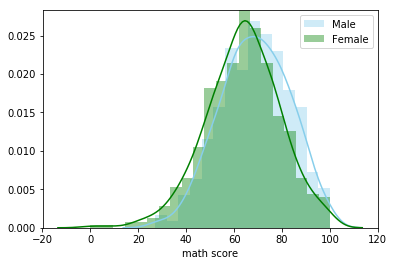

In [13]:
import seaborn as sns
sns.distplot(male, color="skyblue", label="Male")
sns.distplot(female, color="green", label="Female")
plt.legend()

**We would like to see whether whether gender was associated with math scores.**

### Test Statistic
We want our test statistic to be the difference between the mean math score of males and mean math score of females. The value below is our "observed value" of the test statistic. Large positive values of this statistic will favor the alternative hypothesis because if our difference is quite large, then we can assume that there must be some association with gender and math scores. 

In [15]:
observed_difference = np.mean(male) - np.mean(female)
observed_difference 

5.095011134430216

To set up our hypothesis test, we can represent the two views of the world using the following null and alternative hypotheses:

In this cell, write out the appropriate null and alternative hypotheses. Feel free to refer to our demo:

Null: ...

Alternative: ...

(To edit, double click on this cell, and replace the ellipses with your answer)

In these next steps, we want to determine whether the value above is significant. If there were really no difference between the two distributions in the underlying population, then gender shouldn't affect their math score, therefore should make no difference to the average. 

To investigate this more, we will simulate the test statistic under the null hypothesis. 

**Group Question.** Now which simulation method should we use (shuffling, bootsrapping, etc) and why? Could you give a basic outline of the simulation process?

Now we want to stack the total spending of females on top of the spending of males and put it into a data frame. We do this so we can run our simulation of shuffling for our hypothesis test.

In [24]:
def shuffle(series):
    '''
    Shuffles a series and resets index to preserve shuffle when adding series
    back to DataFrame.
    '''
    return series.sample(frac=1, replace=False).reset_index(drop=True)

In [25]:
students["Shuffled"] = shuffle(students["math score"])
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Shuffled
0,female,group B,bachelor's degree,standard,none,72,72,74,65
1,female,group C,some college,standard,completed,69,90,88,35
2,female,group B,master's degree,standard,none,90,95,93,77
3,male,group A,associate's degree,free/reduced,none,47,57,44,30
4,male,group C,some college,standard,none,76,78,75,65


In the cell below, we will simulate our test statistic many times and collect the differences in an array.

In [26]:
#Permutation Test
differences = np.array([])

repetitions = 5000
for i in np.arange(repetitions):
    students["Shuffled"] = shuffle(students["math score"])
  
    # Find the difference between the means of two randomly assigned groups
    male = students[students['gender'] == 'male']['Shuffled']
    female = students[students['gender'] == 'female']['Shuffled']
    simulated_difference = np.mean(male) - np.mean(female)

    differences = np.append(differences, simulated_difference)


Here's a histogram of the simulated difference in means below. What do you observe about the empirical distribution?

/Users/anjaliunnithan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


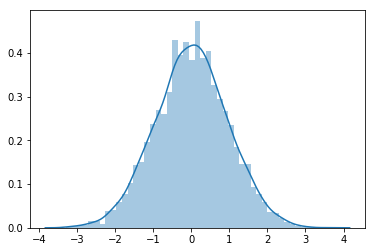

In [27]:
sns.distplot(differences)

Let us now calculate the p-value in order to make a conclusion for this hypothesis test. The p-value in this case would be the proportion of values under the sampling distribution of simulated differences above that are larger or equal to the observed difference. 

***Group Question***: What is the conclusion of our test and why? Explain.

What's our p-value?

In [29]:
p_value = np.count_nonzero(differences >= observed_difference) / repetitions
p_value

0.0

What do we conclude with this p value? Do we reject or fail to reject the null?

## Probabilities

**So what's probability?**


Probability is the:
*   Chance
*   Likelihood

of something happening


**Why do we care?**



*   Help us make informed judgment from randomness in life
*   Estimations
*   Analyze trends
*   Statistical Inference



### Calculating Probability

The probability for a certain event $A$to occur is:

$$P(A) = \frac{E}{n}$$ 

where $P$ is the probability of an event $A$ would occur, 

$E$ is the number of ways the event $A$ can occur, and

$n$ is the total number of outcomes.

And given a certain probability of something that **would** happen, the probability of it **NOT** happening is:

$$P(A^C)=1-P(A)$$

where $A^C$ (the complement of event $A$, read as "A not" or "A complement") is the number of ways event $A$ would not occur.

**Exercise 1.** Given a 6-sided fair dice, what is the probability of getting an even number after rolling once? 

In [ ]:
even = ...
total_sides = ...
P1_even = ...
P1_even

**Exercise 2.** If there are 15 red balls, 28 white balls, and 7 black balls in a box, what is the probability of pulling out a ball that is **not red** from this box? 

In [ ]:
red = ...
total_balls = ...
P2_not_red = ...
P2_not_red

### Basic Sets

Sometimes we are not only interested in 1 simple event, and we make want to stack up the conditions and calculate their probaiblity.

Given 2 **independent** events A and B:

$$P(A ∩ B) = P(A) × P(B)$$

The probability for both $A$ and $B$ to occur, $P(A ∩ B)$ ("A intersect B" or "A and B"), is the product of each event's probability to occur independently. 


**Exercise 3.** Consider 2 identical boxes with the same mix up of colored balls from above (15 R, 28 W, and 7 B), what is the probability that you will pull a red ball from the one box, and a white ball from the other at the same time?

In [ ]:
one_red = ...
one_white = ...
P3_red_and_white = ...
P3_red_and_white

Given two **mutually exclusive** (they never happen at the same time) events A and B:

$$P(A ∪ B) = P(A) + P(B)$$

The probability for either $A$ or $B$ to occur, $P(A ∪ B)$ ("A union B" or "A or B"), is the sum of each event's probability to occur.


**Exercise 4.** Consider only one box with the same color mix up, what is the probability that you will either pull a white or a black from the box?

In [ ]:
white = ...
black = ...
P4_white_or_black = ...
P4_white_or_black

**Challenge:** how do you calculate this for two events that are **NOT** mutually exclusive? Try drawing a venn diagram.

### Conditional Probability

Given 2 events A and B:

$$P(B|A) = \frac{P(A ∩ B)}{P(A)}$$

The probability of $B$ occurring, given $A$ has already occurred, $P(B|A)$, is given by the probability of $A$ and $B$ both occurring divided by the probability of $A$ occurring alone. 

**Exercise 5.** Given the same box and same color mix up, what is the probability that you will pull out a white ball after pulling a red ball?

In [ ]:
red_and_white = ...
red_only = ...
P5_white_given_red = ...
P5_white_given_red

**Challenge:** what is another way of approaching this problem without using this formula?

## And that concludes our notebook. Thank you for attending the workshop!  